![fvhfkjv](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzQ_FBbaBC4xtHoxt0NEdPGBp_2SZSpPGYmw&usqp=CAU)

# استدعاء بعض الملفات المطلوبه 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# قراءه الملفات 

In [2]:
df=pd.read_csv('../input/water-potability/water_potability.csv')

# عرض بعض البيانات 

In [3]:
df.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
print(df.shape)

(3276, 10)


# تفقد البيانات لنرى اذا كان يوجد بيانات مفقوده او لا

In [5]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


# الان نقوم بتنظيف البيانات المفقوده


In [6]:
df.dropna( axis=1, inplace=True)
df.head(10)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
5,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708,0
6,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989,0
7,203.361523,13672.091764,4.563009,474.607645,12.363817,4.401425,0
8,118.988579,14285.583854,7.804174,389.375566,12.706049,3.595017,0
9,227.231469,25484.508491,9.077200,563.885481,17.927806,4.370562,0


**الان اصبحت البيانات نظيفه**

**تتمثل الخطوة الأولى في التعرف على بياناتك في اكتشاف الاختلاف
بينما يمكنك وضع أي شيء في قائمة ، تحتوي أعمدة DataFrame على قيم من نوع بيانات معين. عند مقارنة هياكل بيانات Pandas و Python ، سترى أن هذا السلوك يجعل Pandas أسرع بكثير!**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hardness        3276 non-null   float64
 1   Solids          3276 non-null   float64
 2   Chloramines     3276 non-null   float64
 3   Conductivity    3276 non-null   float64
 4   Organic_carbon  3276 non-null   float64
 5   Turbidity       3276 non-null   float64
 6   Potability      3276 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 179.3 KB


**إظهار إحصائيات الأساسيات
الآن بعد أن تعرفت على أنواع البيانات الموجودة في مجموعة البيانات ، حان الوقت للحصول على نظرة عامة على القيم التي يحتوي عليها كل عمود. يمكنك القيام بذلك باستخدام .describe ():**

In [8]:
df.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,3.966786,0.390110
std,32.879761,8768.570828,1.583085,80.824064,3.308162,0.780382,0.487849
min,47.432000,320.942611,0.352000,181.483754,2.200000,1.450000,0.000000
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,3.439711,0.000000
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,3.955028,0.000000
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,4.500320,1.000000
max,323.124000,61227.196008,13.127000,753.342620,28.300000,6.739000,1.000000


In [9]:
df['Hardness']

0       204.890455
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681735
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64

# تصوير البيانات 

<AxesSubplot:>

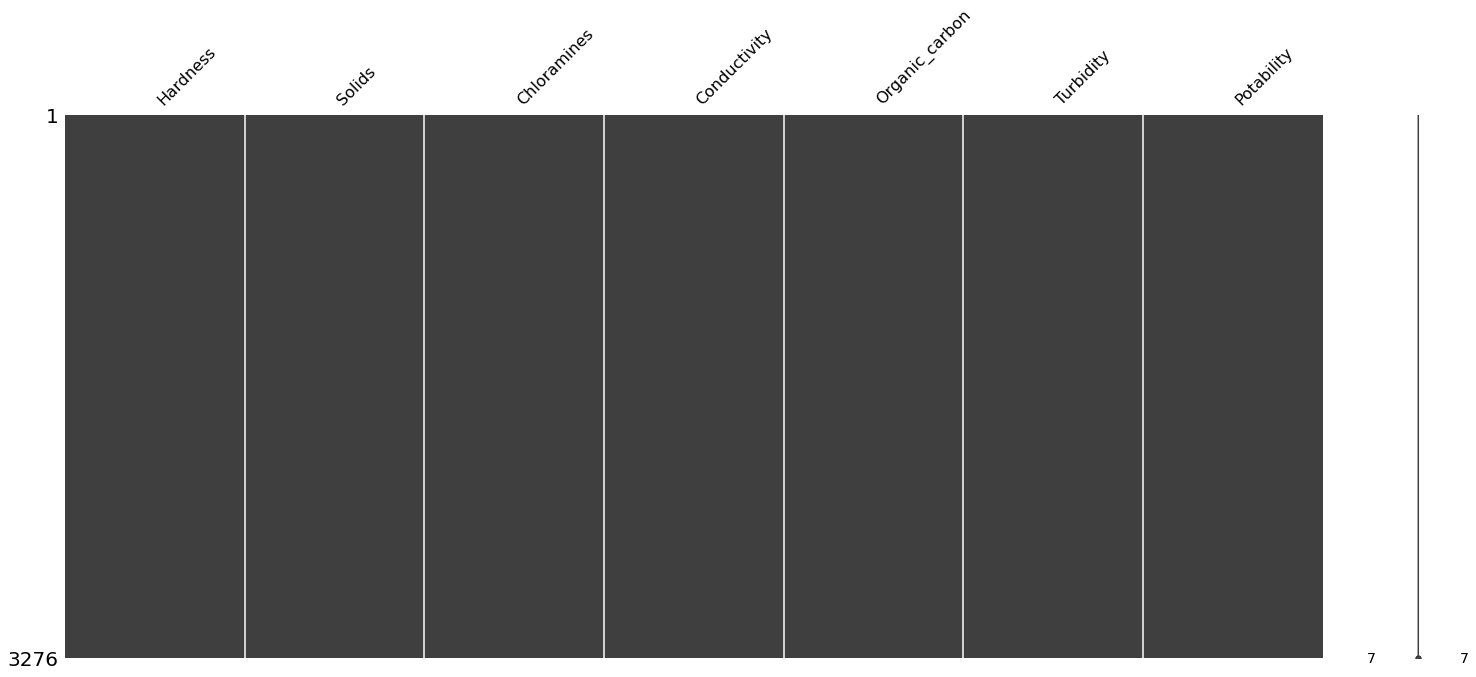

In [10]:
import missingno as msno
msno.matrix(df)

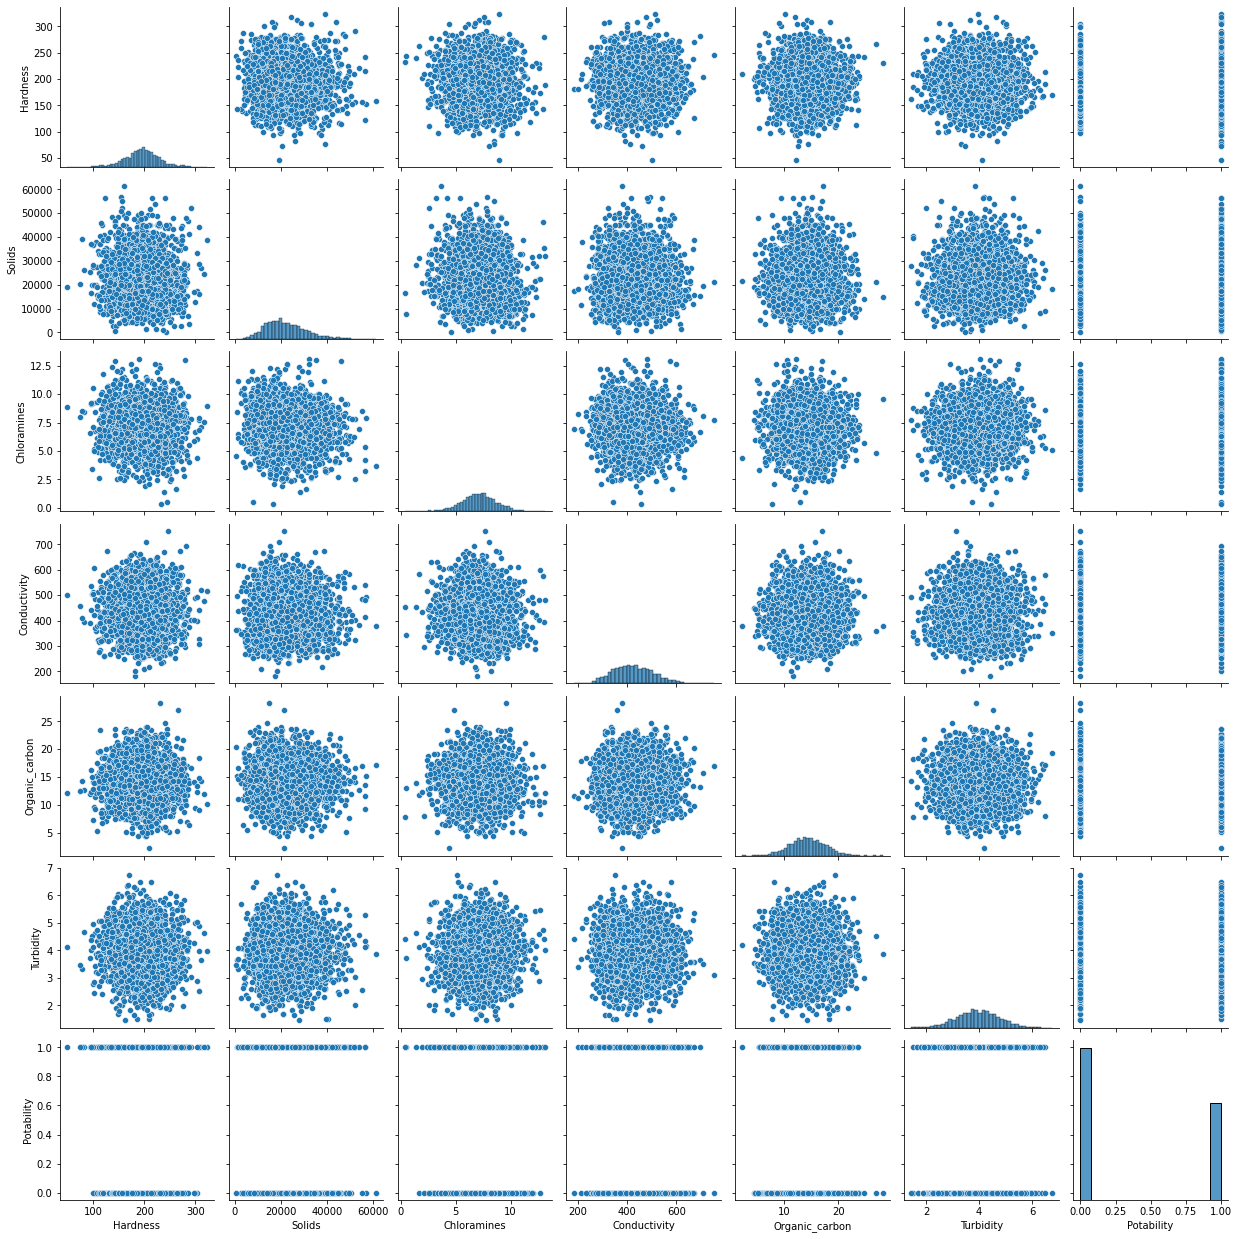

In [11]:
sns.pairplot(data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

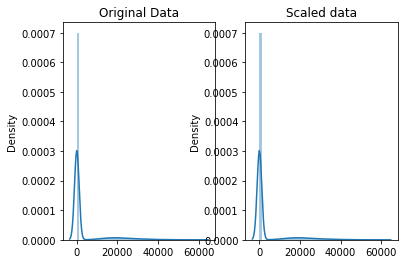

In [12]:
fig, ax = plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(df, ax=ax[1])
ax[1].set_title("Scaled data")

<AxesSubplot:title={'center':'df Dataset'}>

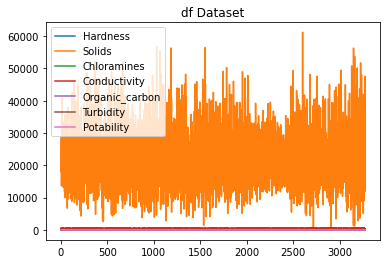

In [13]:
df.plot.line(title='df Dataset')

<AxesSubplot:ylabel='Frequency'>

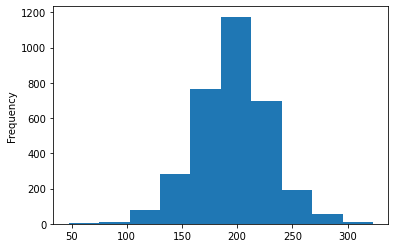

In [14]:
df['Hardness'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

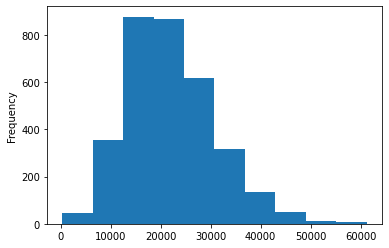

In [15]:
df['Solids'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

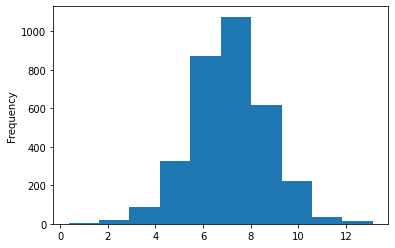

In [16]:
df['Chloramines'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

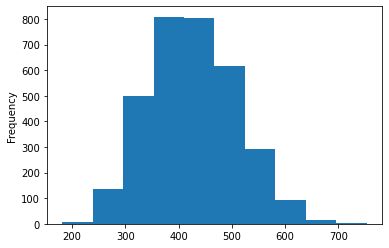

In [17]:
df['Conductivity'].plot.hist()

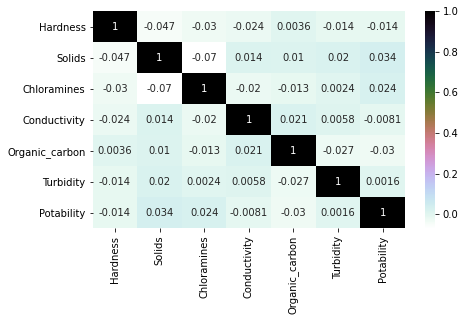

In [18]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hardness', ylabel='Density'>

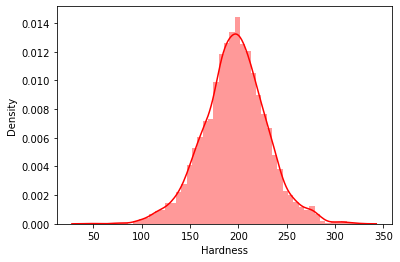

In [19]:
sns.distplot(df['Hardness'], color = 'r', label = 'Solids')

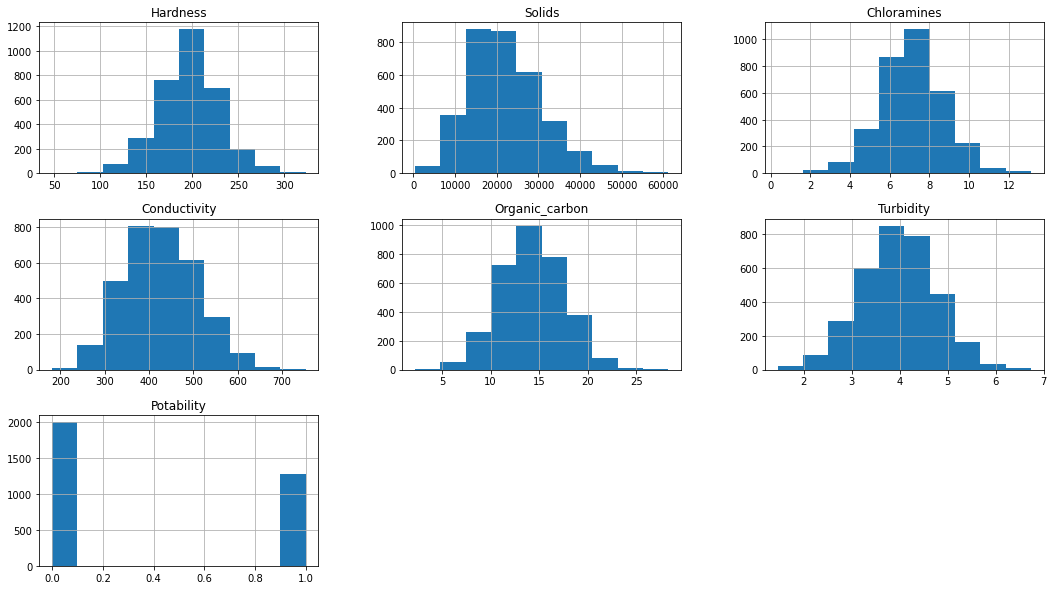

In [20]:
import matplotlib as mpl
%matplotlib inline

df.hist(figsize=(18,10))
plt.show()

(array([  5.,  14.,  25.,  63., 116., 174., 260., 298., 319., 334., 284.,
        249., 236., 222., 159., 132., 110.,  75.,  47.,  64.,  25.,  21.,
         16.,  11.,   7.,   3.,   1.,   5.,   0.,   1.]),
 array([  320.94261127,  2351.15105782,  4381.35950437,  6411.56795092,
         8441.77639747, 10471.98484401, 12502.19329056, 14532.40173711,
        16562.61018366, 18592.81863021, 20623.02707675, 22653.2355233 ,
        24683.44396985, 26713.6524164 , 28743.86086295, 30774.06930949,
        32804.27775604, 34834.48620259, 36864.69464914, 38894.90309568,
        40925.11154223, 42955.31998878, 44985.52843533, 47015.73688188,
        49045.94532842, 51076.15377497, 53106.36222152, 55136.57066807,
        57166.77911462, 59196.98756116, 61227.19600771]),
 <BarContainer object of 30 artists>)

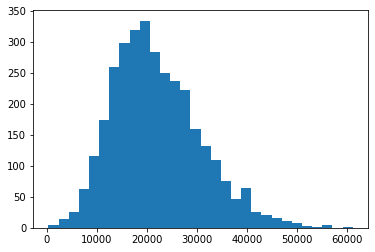

In [21]:
plt.hist(df["Solids"], bins = 30)

(array([  1.,   0.,   1.,   2.,   0.,   9.,  13.,  31.,  35.,  53.,  87.,
        145., 196., 228., 340., 393., 416., 366., 298., 236., 164.,  98.,
         58.,  38.,  33.,  21.,   4.,   4.,   4.,   2.]),
 array([ 47.432     ,  56.62173333,  65.81146667,  75.0012    ,
         84.19093333,  93.38066667, 102.5704    , 111.76013333,
        120.94986667, 130.1396    , 139.32933333, 148.51906667,
        157.7088    , 166.89853333, 176.08826667, 185.278     ,
        194.46773333, 203.65746667, 212.8472    , 222.03693333,
        231.22666667, 240.4164    , 249.60613333, 258.79586667,
        267.9856    , 277.17533333, 286.36506667, 295.5548    ,
        304.74453333, 313.93426667, 323.124     ]),
 <BarContainer object of 30 artists>)

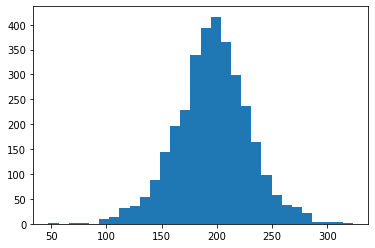

In [22]:
plt.hist(df["Hardness"], bins = 30)

<AxesSubplot:xlabel='Hardness', ylabel='Solids'>

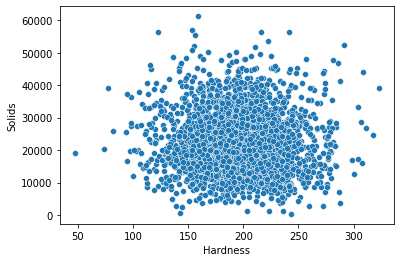

In [23]:
sns.scatterplot(x='Hardness', y='Solids', data=df)

<AxesSubplot:>

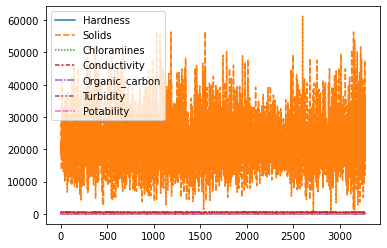

In [24]:
sns.lineplot(data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

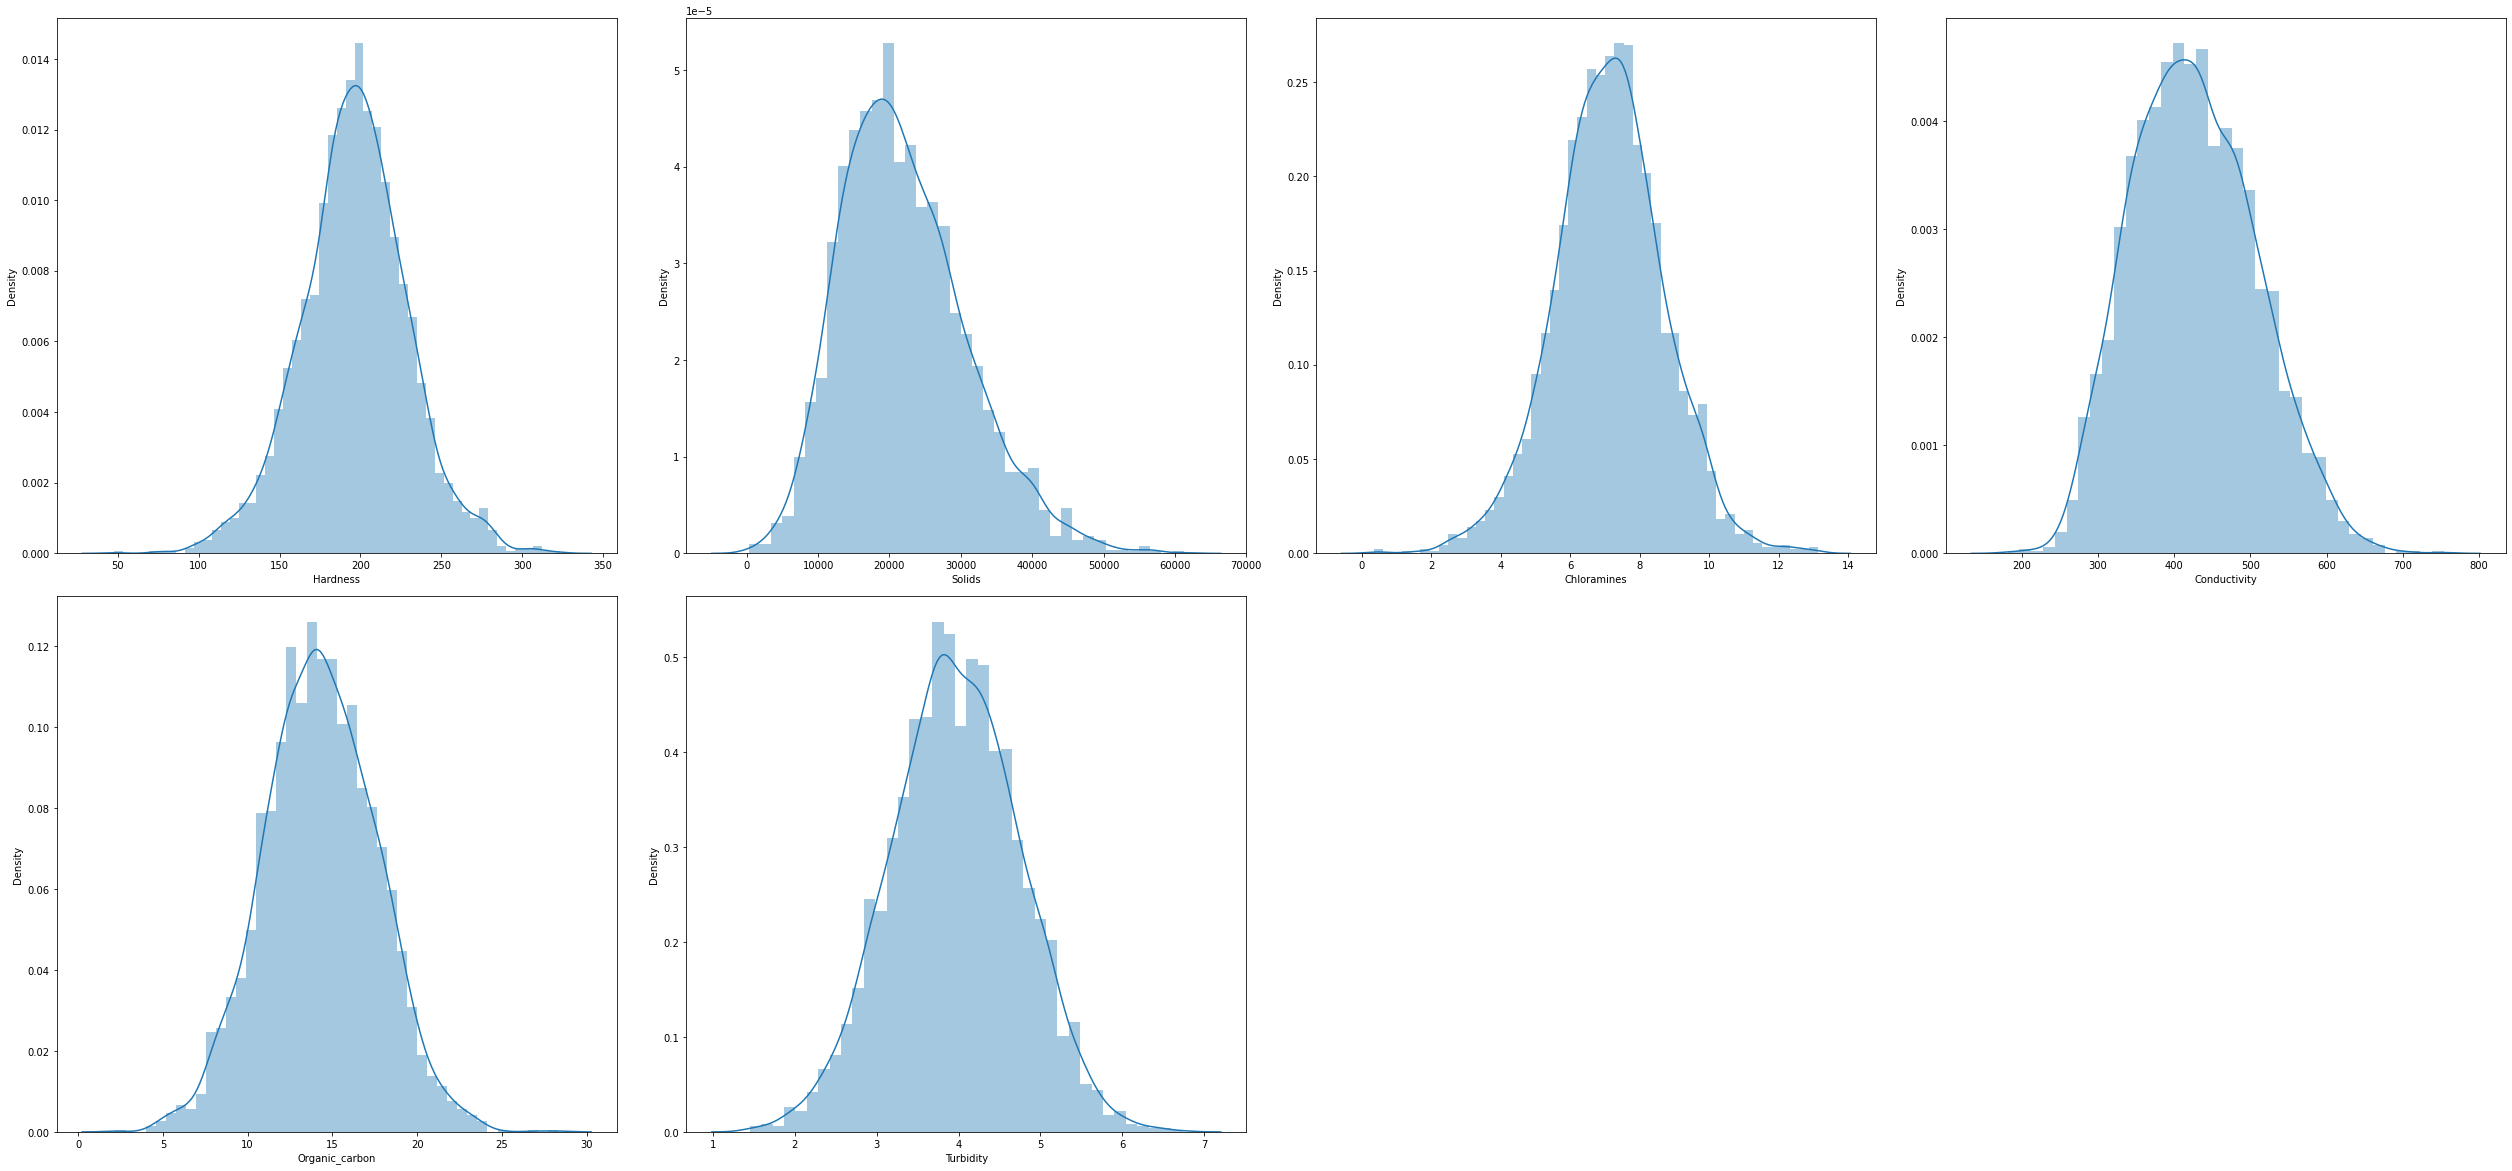

In [25]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.distplot(df[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show() 

In [26]:
df.head(0)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability


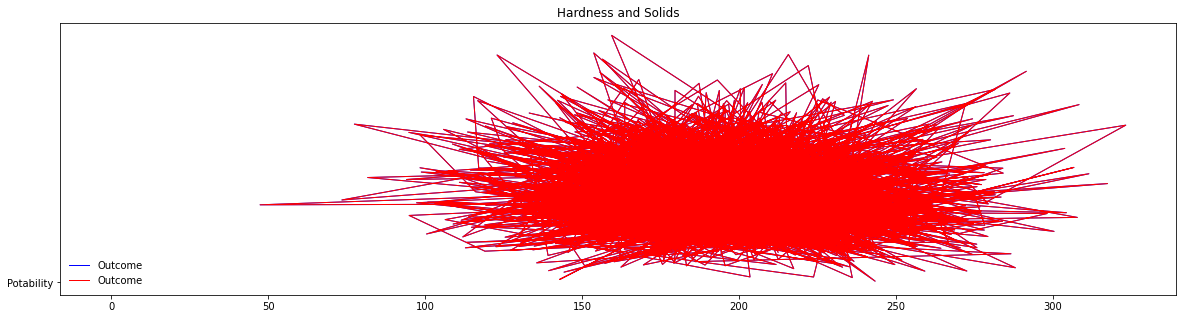

In [27]:
#Soure: https://www.kaggle.com/momincks/rain-tomorrow-in-aus-by-xgboostclassifier : Do check him out.

df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df['Hardness'],df['Solids'],color='blue',linewidth=1, label= 'Outcome')
plt.plot(df['Hardness'],df['Solids'],color='red',linewidth=1, label= 'Outcome')
plt.fill_between(df['Potability'],df['Potability'],['Potability'], facecolor = '#EBF78F')
plt.title('Hardness and Solids')
plt.legend(loc='lower left', frameon=False)
plt.show()

# منحنى ROC مع الانحدار اللوجستي


In [28]:
# abnormal = 1 and normal = 0
df ['Hardness'] = [1 if i == 'Solids' else 0 for i in df.loc[:,'Hardness']]
x,y = df.loc[:,(df.columns != 'Solids') & (df.columns != 'Age')], df.loc[:,'Potability']

# HYPERPARAMETER TUNING

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.6596459096459096


# SVM, pre-process and pipeline

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 1.0
Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


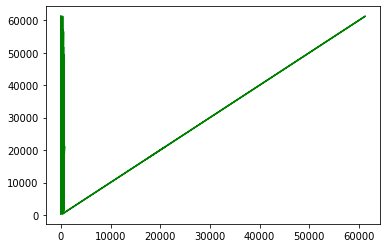

1.0


In [31]:
from sklearn.linear_model import LinearRegression
X_train = np.array(df.iloc[:, :-1].values)
y_train = np.array(df.iloc[:, 1].values)
X_test = np.array(df.iloc[:, :-1].values)
y_test = np.array(df.iloc[:, 1].values)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

plt.plot(X_train, model.predict(X_train), color='green')
plt.show()
print(accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/opt/conda/lib/python3.7/site-packa

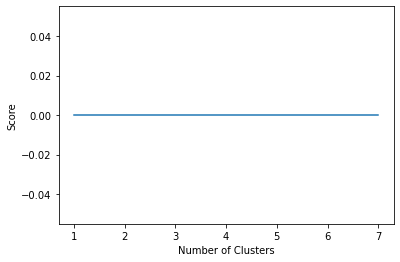

In [32]:
from sklearn.cluster import KMeans
K_clusters = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Hardness']]
X_axis = df[['Solids']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()